# Vorzeichenrangtests nach Wilcoxon 

**Beispiel:** Eine Maschine schneidet Papierbögen mit einer vorgegebenen Ideal- Länge von $\tilde{\mu_0} = 205 mm$, wobei kleine Abweichungen vorkommen können. Um zu überprüfen, ob die Ideal-Länge im Median eingehalten wird, werden $n = 12$
Bögen zufällig entnommen und ihre Länge nachgemessen. Es ergeben sich die Werte 204.8, 205.1, 204.7, 205.5, 205.1, 204.8, 205.1, 205.2, 205.2, 204.9, 205.5, 205.1.

$H_0 : \tilde{\mu} = \tilde{\mu_0} = 205$  
$H_1 : \tilde{\mu} \neq \tilde{\mu_0}$

In [1]:
stichprobe <-  c(204.8, 205.1, 204.7, 205.5, 205.1, 204.8, 205.1, 205.2, 205.2,
                 204.9, 205.5, 205.1)

In [2]:
wilcox.test(x = stichprobe, alternative = "two.sided", mu = 205,
            paired = F, exact = T, correct = F)

Warning message in wilcox.test.default(x = stichprobe, alternative = "two.sided", :
"cannot compute exact p-value with ties"


	Wilcoxon signed rank test

data:  stichprobe
V = 50, p-value = 0.3825
alternative hypothesis: true location is not equal to 205


In [3]:
# mithilfe der signrank() Verteilung den exakten p-Wert berechnen
mu_0 = 205
w_plus = 50

stichprobe <- stichprobe[stichprobe!=mu_0]

n_star = length(stichprobe)
n_star
2*(1-psignrank(q = w_plus, n = n_star, lower.tail = T))

[1] 12

[1] 0.3803711

Die Wahrscheinlichkeit unter der Nullhypothese für $W^+$ einen Wert von 50 oder noch extremer in Richtung der Alternativhypothese zu bekommen, beträgt ca. $38\%$. Wir können somit nicht nachweisen, dass die Maschine vom Median-Sollwert signifikant abweicht ("$H_0$").

# Zwei-Stichproben-Wilcoxon-Test: verbunden

**Beispiel**: Der Datensatz survey enthält die Antworten von 237 Studierenden auf verschiedene Fragen. Unter anderem wurde die Spannweite der Schreibhand Wr.hnd und die Spannweite der Nicht-Schreibhand NW.hnd in cm abgefragt. Gibt es einen bedeutsamen Unterschied in der Spannweite?

In [4]:
#Der Fall zweier verbundener Stichproben wird analog zum t-Test durch Bildung von 
#Differenzen auf den Ein-Stichproben Fall zurückgeführt.
survey <- read.csv("survey.csv", header=TRUE)
wilcox.test(x = survey$Wr.Hnd, y = survey$NW.Hnd, mu = 0, 
            alternative = "two.sided", paired = TRUE, conf.level = 0.95)

t.test(x = survey$Wr.Hnd, y = survey$NW.Hnd, mu = 0, 
       alternative = "two.sided", paired = TRUE, conf.level = 0.95)


	Wilcoxon signed rank test with continuity correction

data:  survey$Wr.Hnd and survey$NW.Hnd
V = 10919, p-value = 0.08225
alternative hypothesis: true location shift is not equal to 0



	Paired t-test

data:  survey$Wr.Hnd and survey$NW.Hnd
t = 2.1268, df = 235, p-value = 0.03448
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.006367389 0.166513967
sample estimates:
mean of the differences 
             0.08644068 


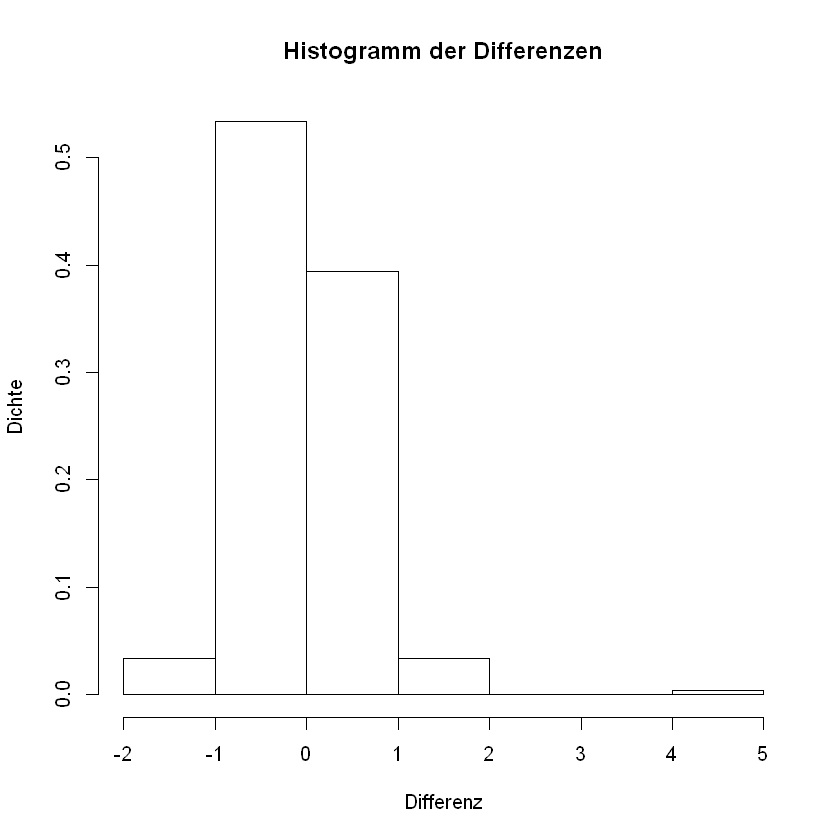

In [5]:
hist(survey$Wr.Hnd - survey$NW.Hnd, freq = F, xlab="Differenz", ylab="Dichte",
     main="Histogramm der Differenzen")

Das Histogramm zeigt, dass die empirische Verteilung von den Differenzen nicht symmetrisch ist, sondern (insbesondere bedingt durch einen Ausreißer) eine Rechtsschiefe aufweist. Der Wilcoxon-Test reagiert hierauf also weniger stark, was im gegeben Kontext sinnvoll sein könnte.
Es führt dazu ,dass im Unterschied zu dem entsprechenden t-Test  ein p-Wert größer als $\alpha = 0.05$ ("$H_0$") wird. 

# Zweistichproben-Wilcoxon-Test: unverbunden

 Gibt es in der Spannweite der Schreibhand Wr.Hnd einen Unterschied im Hinblick auf das Geschlecht?

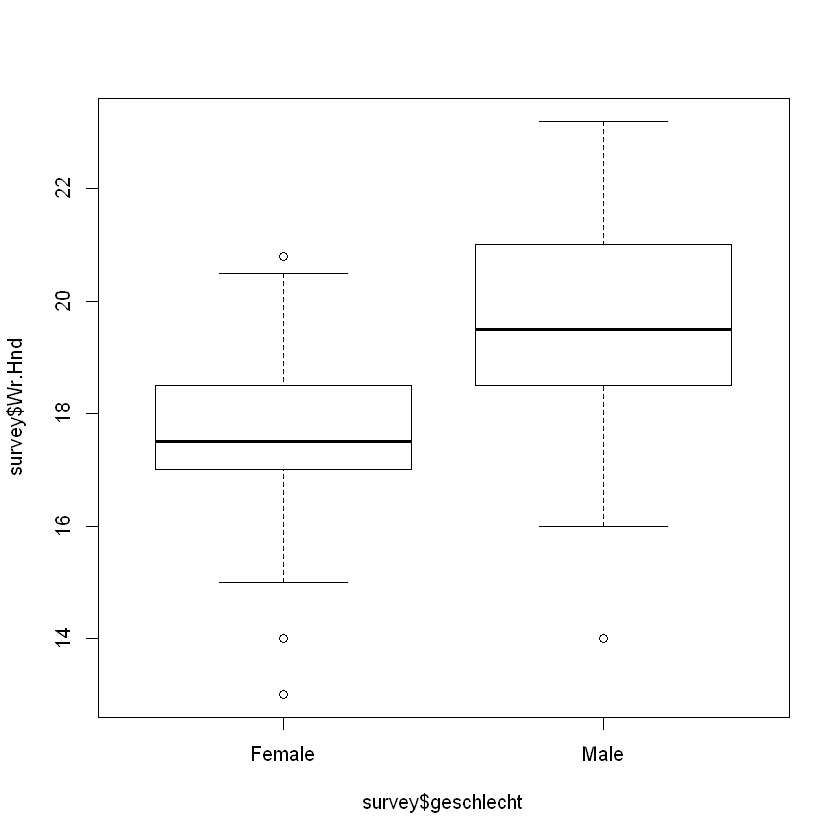

In [6]:
survey$geschlecht <- survey$Sex
boxplot(survey$Wr.Hnd ~ survey$geschlecht)

In [7]:
wilcox.test(x = survey$Wr.Hnd[survey$geschlecht=="Female"],
            y = survey$Wr.Hnd[survey$geschlecht=="Male"], 
       mu = 0, alternative = "two.sided", paired = FALSE, var.equal = TRUE, 
            conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  survey$Wr.Hnd[survey$geschlecht == "Female"] and survey$Wr.Hnd[survey$geschlecht == "Male"]
W = 2137.5, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Basierend auf einem Signifikanzniveau von $\alpha = 0.05$ konnte ein statistisch signifikanter Unterschied zwischen der Spannweite der Schreibhand im Hinblick auf das Geschlecht nachgewiesen werden.